In [1]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
if ('0.11' in sns.__version__) or ('0.12' in sns.__version__):
    sns.set_theme()
else:
    sns.set()
import sys
!{sys.executable} -m pip install textblob
import textblob

In [2]:
#https://www.kaggle.com/datasets/yasserh/twitter-tweets-sentiment-dataset
tweets = pd.read_csv("Tweets.csv")
tweets.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [3]:
#https://www.ncei.noaa.gov/cdo-web/datasets
climate = pd.read_csv("GHCND_sample_csv.csv")
print(climate.shape)

(31, 9)


In [4]:
#https://ia600501.us.archive.org/view_archive.php?archive=/32/items/twitter_cikm_2010/twitter_cikm_2010.zip&file=training_set_users.txt
training_users = pd.read_csv("training_set_users.txt", sep="\t", header=None, names=["UserID","UserLocation"])
training_users.head()


,UserID,UserLocation
0,14,San Francisco
1,15,San Francisco
2,18,"San Francisco, CA"
3,19922973,"Chicago, IL"
4,63963170,New York


In [15]:
#https://ia600501.us.archive.org/view_archive.php?archive=/32/items/twitter_cikm_2010/twitter_cikm_2010.zip&file=training_set_tweets.txt
training_tweets = pd.read_csv("training_set_tweets.txt", sep="\t", header=None, names=["UserID","TweetID","Tweet","CreatedAt"])
training_tweets = training_tweets[training_tweets["UserID"].str.isnumeric() == True]
training_tweets["UserID"] = training_tweets["UserID"].astype("int")
print(training_tweets.shape)

training_tweets_1 = pd.read_csv("training_set_tweets_1.txt", sep="\t", header=None, names=["UserID","TweetID","Tweet","CreatedAt"])
training_tweets_1 = training_tweets_1[training_tweets_1["UserID"].str.isnumeric() == True]
training_tweets_1["UserID"] = training_tweets_1["UserID"].astype("int")
print(training_tweets_1.shape)

(864, 4)
(3876, 4)


In [16]:
t_user_tweets = training_users.merge(training_tweets_1, on="UserID", how="left")

pol = pd.read_excel("cbsafactbook2021.xlsx", header=2)[:579][["Core Based Statistical Area (CBSA)", "2010 Population", "CO           8-hr (ppm)", "NO2      AM (ppb)", "NO2          1-hr (ppb)", "SO2         1-hr (ppb)"]]
pol = pol.rename(columns={'Core Based Statistical Area (CBSA)': 'City, State', 'CO           8-hr (ppm)': 'CO2 Mean', "NO2      AM (ppb)":"NO2 AM Mean", "NO2          1-hr (ppb)":"NO2 1-hr Mean","SO2         1-hr (ppb)": "SO2 Mean"})
pol = pol.replace("ND", np.nan)
pol = pol.replace("IN", np.nan)
city = r'^([^,]*)'
state = r',\s*([^,]*)'
pol["City"] = pol["City, State"].str.extract(city)
pol["State"] = pol["City, State"].str.extract(state)
pol = pol.groupby("City")[["CO2 Mean", "NO2 AM Mean", "NO2 1-hr Mean", "SO2 Mean"]].mean()
pol
#pol = pd.read_csv("uspollution_pollution_us_2000_2016.csv", usecols = ["City", "Date Local", "NO2 Mean", "SO2 Mean", "CO Mean"])
#pol = pol[pol["Date Local"].str.contains("2016")]
#t_user_tweets.head()
#pol = pol.groupby("City")[["NO2 Mean", "SO2 Mean", "CO Mean"]].mean()
#print(pol)

,CO2 Mean,NO2 AM Mean,NO2 1-hr Mean,SO2 Mean
City,,,,
Aberdeen,NaN,NaN,NaN,NaN
Adjuntas,NaN,NaN,NaN,NaN
Adrian,NaN,NaN,NaN,NaN
Aguadilla-Isabela,NaN,NaN,NaN,NaN
Akron,NaN,NaN,NaN,5.0
...,...,...,...,...
Yakima,NaN,NaN,NaN,NaN
York-Hanover,NaN,8.0,40.0,15.0
Youngstown-Warren-Boardman,NaN,NaN,NaN,NaN


In [18]:
t_user_tweets["Sentiment"] = t_user_tweets["Tweet"].astype(str).apply(lambda tweet: textblob.TextBlob(tweet).sentiment.polarity)
city = r'^([^,]*)'
state = r',\s*([^,]*)'
t_user_tweets["City"] = t_user_tweets["UserLocation"].str.extract(city)
t_user_tweets["State"] = t_user_tweets["UserLocation"].str.extract(state)
print(t_user_tweets.shape)
t_user_tweets.dropna(subset=['Tweet'], inplace=True)
tweets = pd.merge(t_user_tweets, pol, on = "City", how = "left")
tweets.head()

(4293, 8)


,UserID,UserLocation,TweetID,Tweet,CreatedAt,Sentiment,City,State,CO2 Mean,NO2 AM Mean,NO2 1-hr Mean,SO2 Mean
0,14,San Francisco,1567978127,The flock of bees splatter the windshield like...,2009-04-20 14:09:20,0.000000,San Francisco,NaN,NaN,NaN,NaN,NaN
1,14,San Francisco,1551907112,"Watching him on TV, I wondered how I became so...",2009-04-18 12:16:56,0.000000,San Francisco,NaN,NaN,NaN,NaN,NaN
2,14,San Francisco,1539281043,My inner dirthead child limps a smile at the ...,2009-04-16 22:30:57,0.008333,San Francisco,NaN,NaN,NaN,NaN,NaN
3,14,San Francisco,1513711531,Riding this blue steel dog Down thru the atmos...,2009-04-13 21:14:58,0.073611,San Francisco,NaN,NaN,NaN,NaN,NaN
4,14,San Francisco,1455281562,"Driving this blue steel dog, pregnant and lumb...",2009-04-04 22:48:26,0.166667,San Francisco,NaN,NaN,NaN,NaN,NaN


In [23]:
import matplotlib.pyplot as plt
plot = tweets.groupby("City")[["Sentiment", "SO2 Mean"]].mean().sort_values("SO2 Mean")


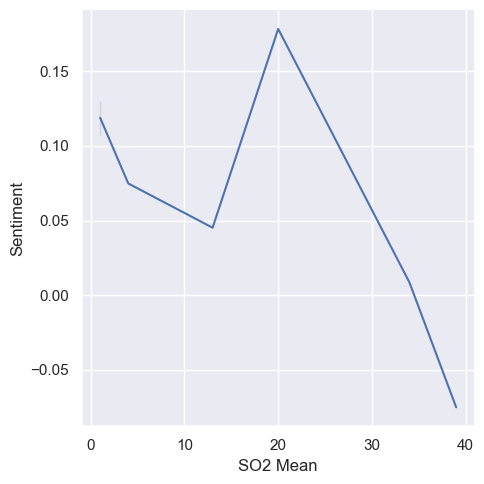

In [26]:
sns.relplot(x = "SO2 Mean", y = "Sentiment", data = plot, kind = "line")
plt.show()

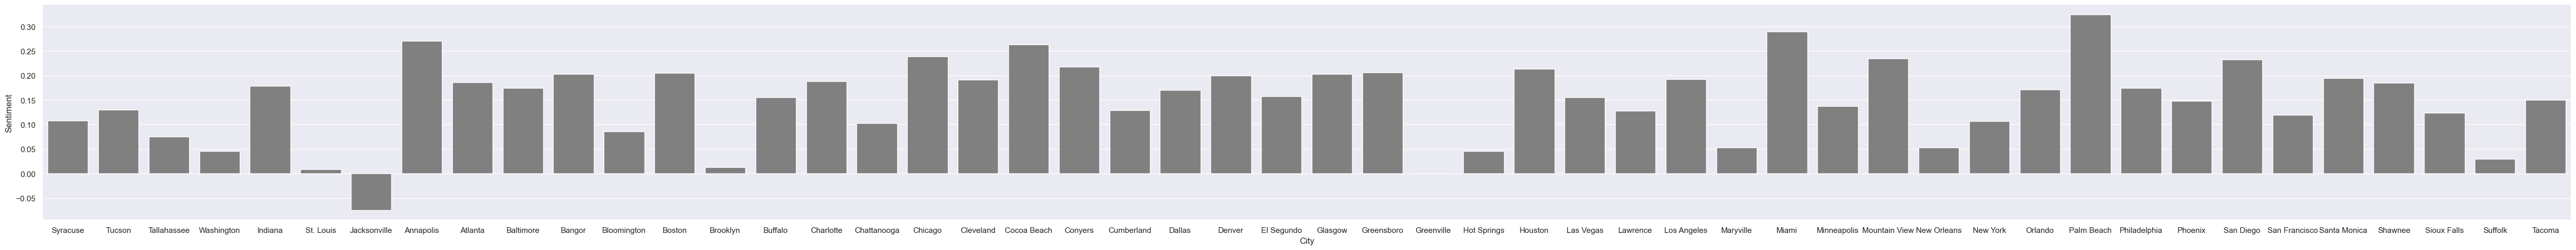

In [29]:
plot1 = tweets.groupby("City", as_index=False)[["Sentiment", "SO2 Mean"]].mean().sort_values("SO2 Mean")
sns.catplot(x="City", y = "Sentiment", data = plot1, kind = "bar", 
            color="gray", aspect=10)
plt.show()